# Modelo FitzHugh-Nagumo

Vamos a implementar un modelo de sistema excitable que intenta imitar las neuronas, resolviendo las ecuaciones diferenciales que lo definen.
$$
\dot{v}=v-v^3/3-w+I_{ext} \\
t\dot{w}=v+a-bw
$$


In [1]:
tau=12.5
a=0.7
b=0.8

function vdot(v,w,I)
    return v-v^3-w+I
end

#forma corta de declarar una funcion
wdot(v, w)=(v+a-b*w)/tau
    

wdot (generic function with 1 method)

In [2]:
(v,w,I)=(8.0, 2.0, 0.5)

(8.0,2.0,0.5)

In [3]:
vdot(v,w,I)

-505.5

In [4]:
wdot(v,w)

0.568

Vamos a intentar resolver el sistema a lo Euler

In [5]:
epsilon=0.1
for t=0:epsilon:5
    v=v+epsilon*vdot(v,w,I)
    w+=epsilon*wdot(v,w)
end
    

In [6]:
archivonombre="DatosFHM01.dat"
archivo=open(archivonombre,"w")

IOStream(<file DatosFHM01.dat>)

In [7]:
archivo=open(archivonombre,"w")
epsilon=0.1
(v,w,I)=(0.5, 2.0, 0.5)

for t=0:epsilon:100
    v=v+epsilon*vdot(v,w,I)
    w+=epsilon*wdot(v,w)
    println(archivo, t,"\t",v,"\t",w)

end
close(archivo)

In [8]:
using PyPlot

In [9]:
datos=readdlm("DatosFHM01.dat");
xxs=datos[:,1]
yys=datos[:,2]
zzs=datos[:,3];

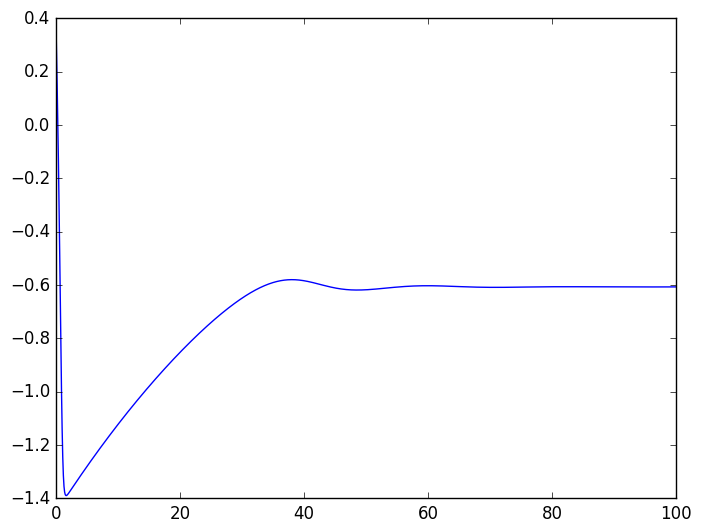

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faa9518dba8>

In [10]:
plot(xxs,yys)
#scatter(xxs,yys)

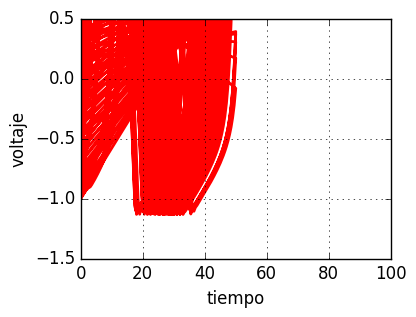

In [53]:
figure(figsize=(4,3))
grid()
xlim(0,100)
ylim(-1.5,0.5)
xlabel("tiempo")
ylabel("voltaje")
plot(xxs,yys, lw=2, color="red")
savefig("Disparo01.png",dpi=90)

In [12]:
function integraFN!(v,w,I, arxiv, tmax=5*tau,epsilon=0.5,)

    for t=0:epsilon:tmax
        v=v+epsilon*vdot(v,w,I)
        w+=epsilon*wdot(v,w)
        println(arxiv, t,"\t",v,"\t",w)
      
    end
    return "listo"
end

function integraFN!(v,w,I, tmax=5*tau,epsilon=0.5,)

    for t=0:epsilon:tmax
        v=v+epsilon*vdot(v,w,I)
        w+=epsilon*wdot(v,w)
        println(t,"\t",v,"\t",w)
      
    end

end

integraFN! (generic function with 4 methods)

In [ ]:
(v,w,I)=(1.0, 0.0, 0.5)
integraFN!(v,w,I)

In [24]:
archivo=open(archivonombre,"w")
for vini=-1:0.2:1,wini=-1:0.2:1
    
    (vau,wau,Iau)=(vini,wini,1)

    integraFN!(vau,wau,Iau, archivo, 50,0.5)

end
close(archivo)

In [25]:
datos=readdlm("DatosFHM01.dat");
xxs=datos[:,1]
yys=datos[:,2]
zzs=datos[:,3];

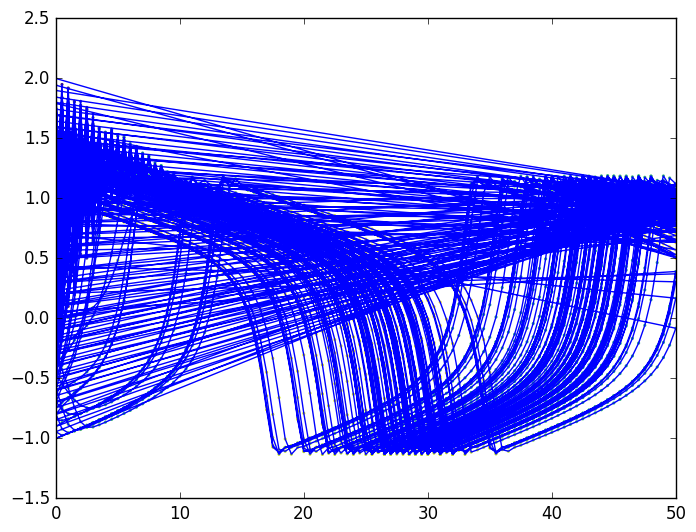

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faa8d780940>

In [51]:
xlim(0,50)
scatter(xxs,yys, c=zzs, cmap="viridis", edgecolors="None", s=5, )
plot(xxs,yys)

In [54]:
size(datos)

(12221,3)

In [59]:
12221/121

101.0

In [62]:
datos2=reshape(datos, 101,121*3)

101x363 Array{Float64,2}:
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  …  0.6568    0.8464    1.036  
  0.5   0.5   0.5   0.5   0.5   0.5   0.5     0.708086  0.889767  1.07013
  1.0   1.0   1.0   1.0   1.0   1.0   1.0     0.758546  0.931269  1.10246
  1.5   1.5   1.5   1.5   1.5   1.5   1.5     0.806077  0.970695  1.13306
  2.0   2.0   2.0   2.0   2.0   2.0   2.0     0.851601  1.00816   1.16197
  2.5   2.5   2.5   2.5   2.5   2.5   2.5  …  0.894894  1.04373   1.18926
  3.0   3.0   3.0   3.0   3.0   3.0   3.0     0.936112  1.07745   1.21496
  3.5   3.5   3.5   3.5   3.5   3.5   3.5     0.975303  1.1094    1.23913
  4.0   4.0   4.0   4.0   4.0   4.0   4.0     1.01254   1.13961   1.26182
  4.5   4.5   4.5   4.5   4.5   4.5   4.5     1.04788   1.16816   1.28306
  5.0   5.0   5.0   5.0   5.0   5.0   5.0  …  1.08139   1.19509   1.30289
  5.5   5.5   5.5   5.5   5.5   5.5   5.5     1.11312   1.22045   1.32136
  6.0   6.0   6.0   6.0   6.0   6.0   6.0     1.14314   1.24429   1.3385 
  ⋮         

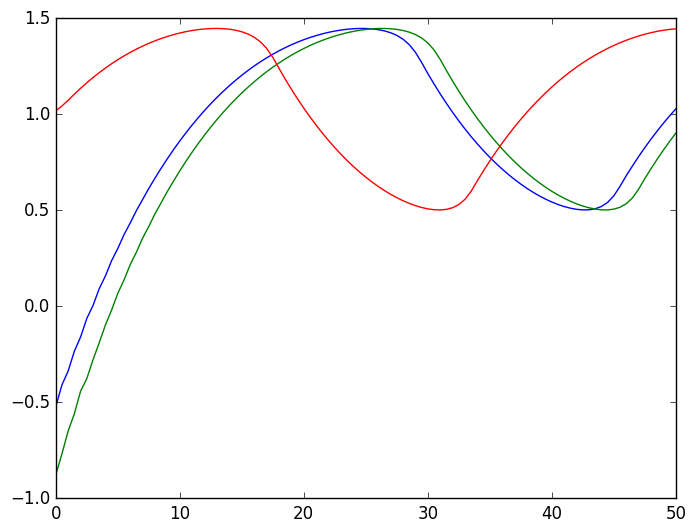

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faa9413d240>

In [68]:
plot(datos2[:,1], datos2[:,300])
plot(datos2[:,1], datos2[:,320])
plot(datos2[:,1], datos2[:,330])